# CICERO SCM notebook parallel example

Import some stuff

In [1]:
import sys
import re
import os
import numpy as np
import shutil
import matplotlib.pyplot as plt
import pandas as pd
import pandas.testing as pdt
import warnings
try:
    from pandas.core.common import SettingWithCopyWarning
except:
    from pandas.errors import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

Import the model

In [2]:
sys.path.insert(0,os.path.join(os.getcwd(), '../', 'src'))
from ciceroscm import CICEROSCM

Define some input handling functions to give us example inputs

In [3]:
# NBVAL_IGNORE_OUTPUT
#from ciceroscm.input_handler import read_inputfile,read_components,read_natural_emissions
from ciceroscm.parallel.cscmparwrapper import run_ciceroscm_parallel
import ciceroscm.input_handler as input_handler

/home/masan/gitrepos/ciceroscm/notebooks/../src/ciceroscm/parallel/_parallel_process.py:9: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


Define data directory

In [4]:
test_data_dir = os.path.join(os.getcwd(), '../', 'tests', 'test-data')

Define emissions data

In [5]:

gaspam_data = input_handler.read_components(
    os.path.join(test_data_dir, "gases_v1RCMIP.txt")
)
conc_data = input_handler.read_inputfile(
    os.path.join(test_data_dir, "ssp245_conc_RCMIP.txt"), True, 1750, 2100
)
ih = input_handler.InputHandler({"nyend": 2050, "nystart": 1900, "emstart": 2015})
em_data = ih.read_emissions(os.path.join(test_data_dir, "ssp245_em_RCMIP.txt"))
nat_ch4_data = input_handler.read_natural_emissions(
    os.path.join(test_data_dir, "natemis_ch4.txt"), "CH4"
)
nat_n2o_data = input_handler.read_natural_emissions(
    os.path.join(test_data_dir, "natemis_n2o.txt"), "N2O"
)

Make a list of dictionaries to define the parameter ensemble - keys should be pamset_udm, pamset_emiconc and Index...

In [6]:
   cfgs = [
        {
            "pamset_udm": {
                "rlamdo": 15.1,
                "akapa": 0.657,
                "cpi": 0.208,
                "W": 2.2,
                "beto": 6.9,
                "lambda": 0.606,
                "mixed": 107.0,
            },
            "pamset_emiconc": {
                "qbmb": 0.0,
                "qo3": 0.5,
                "qdirso2": -0.3701,
                "qindso2": -0.4163,
                "qbc": 0.163,
                "qoc": -0.084,
                "qh2o_ch4": 0.171,
            },
            "pamset_carbon":{
                "npp0": 60,
                "solubility_sens": 0,
                "ml_t_half": 10,
                "t_half": 10,
                "t_threshold": 10
            },
            "Index": "13555_old_NR_rounded",
        },
        {
            "pamset_udm": {
                "rlamdo": 15.08357,
                "akapa": 0.6568376339229769,
                "cpi": 0.2077266,
                "W": 2.205919,
                "beto": 6.89822,
                "lambda": 0.6062529,
                "mixed": 107.2422,
            },
            "pamset_emiconc": {
                "qbmb": 0.0,
                "qo3": 0.5,
                "qdirso2": -0.3562,
                "qindso2": -0.96609,
                "qbc": 0.1566,
                "qoc": -0.0806,
            },
            "pamset_carbon":{
                "npp0": 60,
                "solubility_sens": 0,
                "ml_t_half": 10,
                "t_half": 10,
                "t_threshold": 10
            },
            "Index": "13555_old_NR_improved",
        },
        {
            "pamset_udm": {
                "rlamdo": 15.08357,
                "akapa": 0.6568376339229769,
                "cpi": 0.2077266,
                "W": 2.205919,
                "beto": 6.89822,
                "lambda": 0.6062529,
                "mixed": 107.2422,
            },
            "pamset_emiconc": {
                "qbmb": 0.0,
                "qo3": 0.5,
                "qdirso2": -0.3701323367808028 / 1.5,
                "qindso2": -0.4162980444986502 * 1.5,
                "qbc": 0.162692563111132,
                "qoc": -0.08377713183167902,
            },
            "pamset_carbon":{
                "npp0": 60,
                "solubility_sens": 0,
                "ml_t_half": 10,
                "t_half": 10,
                "t_threshold": 10
            },
            "Index": "13555_old_NR",
        },
        {
            "pamset_udm": {
                "rlamdo": 5.269455,
                "akapa": 0.40099950002568496,
                "cpi": 0.2054687,
                "W": 1.95183,
                "beto": 3.278654,
                "lambda": 0.7308369,
                "mixed": 115.1219,
            },
            "pamset_emiconc": {
                "qbmb": 0.0,
                "qo3": 0.3,
                "qdirso2": -0.32211222516087934,
                "qindso2": -0.3622885009449893,
                "qbc": 0.1415852070009452,
                "qoc": -0.07290808089507649,
            },
            "pamset_carbon":{
                "npp0": 60,
                "solubility_sens": 0,
                "ml_t_half": 10,
                "t_half": 10,
                "t_threshold": 10
            },
            "Index": "10496_old_NR",
        },
        {
            "pamset_udm": {
                "rlamdo": 5.269455,
                "akapa": 0.40099950002568496,
                "cpi": 0.2054687,
                "W": 1.95183,
                "beto": 3.278654,
                "lambda": 0.7308369,
                "mixed": 115.1219,
            },
            "pamset_emiconc": {
                "qbmb": 0.0,
                "qo3": 0.3,
                "qdirso2": -0.32211222516087934,
                "qindso2": -0.3622885009449893,
                "qbc": 0.1415852070009452,
                "qoc": -0.07290808089507649,
            },
            "pamset_carbon":{
                "npp0": 60,
                "solubility_sens": 0,
                "ml_t_half": 10,
                "t_half": 10,
                "t_threshold": 10
            },
            "Index": "10974_old_NR",
        },
        {
            "pamset_udm": {
                "rlamdo": 23.71469,
                "akapa": 0.5486541129586187,
                "cpi": 0.4059296,
                "W": 2.090927,
                "beto": 4.426507,
                "lambda": 0.6345007,
                "mixed": 97.25478,
            },
            "pamset_emiconc": {
                "qbmb": 0.0,
                "qo3": 0.3,
                "qdirso2": -0.4031202924043847,
                "qindso2": -0.453400507735301,
                "qbc": 0.17719249872571508,
                "qoc": -0.09124374858602939,
            },
            "pamset_carbon":{
                "npp0": 60,
                "solubility_sens": 0,
                "ml_t_half": 10,
                "t_half": 10,
                "t_threshold": 10
            },
            "Index": "Unknown_old_NR",
        },
        {
            "pamset_udm": {
                "rlamdo": 23.13088,
                "akapa": 0.6588532950589802,
                "cpi": 0.1690946,
                "W": 2.228695,
                "beto": 2.623041,
                "lambda": 0.5402487,
                "mixed": 99.86714,
            },
            "pamset_emiconc": {
                "qbmb": 0.0,
                "qo3": 0.3,
                "qdirso2": -0.882827534329248,
                "qindso2": -0.9929404692583796,
                "qbc": 0.3880489761967636,
                "qoc": -0.1998224726091362,
            },
            "pamset_carbon":{
                "npp0": 60,
                "solubility_sens": 0,
                "ml_t_half": 10,
                "t_half": 10,
                "t_threshold": 10
            },
            "Index": "28925_old_NR",
        },
    ]

Define scenarios as a list of dictionaries.

In [7]:
scenarios=[]
for i in range(3):
    em_data_here = em_data.mul((1 + i / 5))
    new_scen = {
        "gaspam_data": gaspam_data,
        "nyend": 2050,
        "nystart": 1900,
        "emstart": 2015,
        "concentrations_data": conc_data,
        "nat_ch4_data": nat_ch4_data,
        "nat_n2o_data": nat_n2o_data,
        "emissions_data": em_data_here,
        "udir": test_data_dir,
        "idtm":24,
        "scenname": "ssp245-plus-%d-percent" % np.multiply(i,20.),
    }
    scenarios.append(new_scen)
    
    

Parallel processor loops over all scenarios and configuration lists

In [8]:
# NBVAL_IGNORE_OUTPUT
output_variables = ["Heat Content|Ocean", "Surface Air Temperature Change"]
results = run_ciceroscm_parallel(scenarios, cfgs, output_variables)


Parallel runs:   0%|          | 0.00/6.00 [00:00<?, ?it/s]

Look at the output openSCMrunner object

In [9]:
# NBVAL_IGNORE_OUTPUT
results.head()

,climate_model,model,run_id,scenario,region,variable,unit,1900,1901,1902,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,CICERO-SCM-PY,ssp245-plus-0-percent,13555_old_NR_rounded,ssp245-plus-0-percent,World,Heat Content|Ocean,ZJ,-0.593835,-6.251352,-18.616866,...,-21091.443929,-20989.637256,-20883.309435,-20772.603029,-20657.641937,-20538.536387,-20415.385718,-20288.280291,-20157.302911,-20022.529894
1,CICERO-SCM-PY,ssp245-plus-0-percent,13555_old_NR_rounded,ssp245-plus-0-percent,World,Surface Air Temperature Change,K,-0.005125,-0.052988,-0.145813,...,-21.682198,-21.222043,-20.756595,-20.286847,-19.813445,-19.336858,-18.85745,-18.375515,-17.891299,-17.405009
2,CICERO-SCM-PY,ssp245-plus-0-percent,13555_old_NR_improved,ssp245-plus-0-percent,World,Heat Content|Ocean,ZJ,-0.593855,-9.481376,-29.822458,...,-35483.952967,-35333.376433,-35175.469471,-35010.452786,-34838.517227,-34659.831569,-34474.547039,-34282.800415,-34084.716314,-33880.408924
3,CICERO-SCM-PY,ssp245-plus-0-percent,13555_old_NR_improved,ssp245-plus-0-percent,World,Surface Air Temperature Change,K,-0.005126,-0.08106,-0.236089,...,-37.439073,-36.658834,-35.869674,-35.073196,-34.270468,-33.462272,-32.649223,-31.83182,-31.010478,-30.185551
4,CICERO-SCM-PY,ssp245-plus-0-percent,13555_old_NR,ssp245-plus-0-percent,World,Heat Content|Ocean,ZJ,-0.593855,-6.763629,-20.395331,...,-23405.993366,-23295.484797,-23179.995851,-23059.681751,-22934.677351,-22805.10255,-22671.065343,-22532.66391,-22389.988166,-22243.120936


Plot some plume plots, showing the range of temperature for each scenario (looking at percentiles of the parameter response distribution)

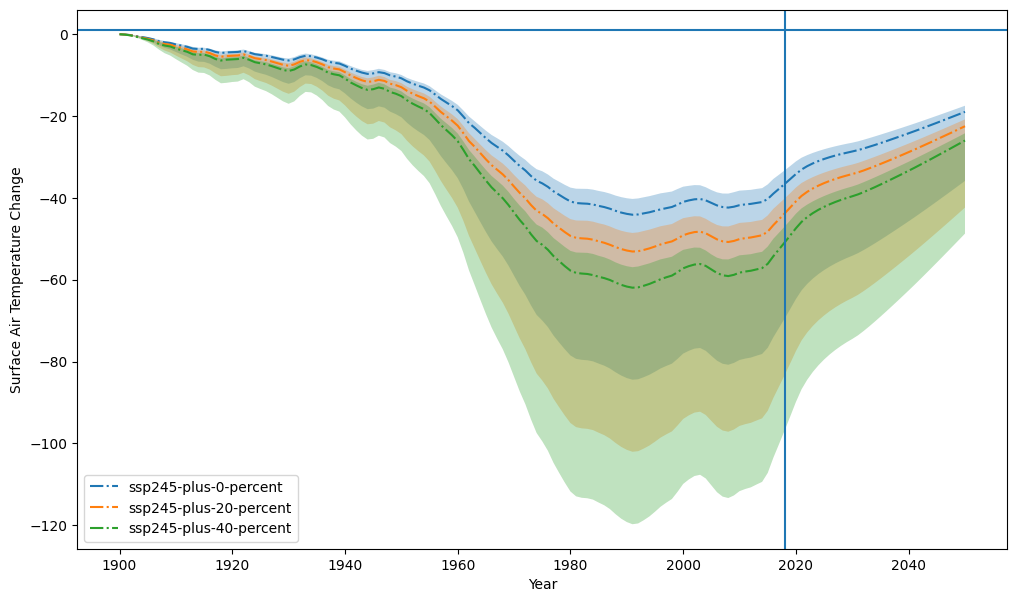

In [10]:

# NBVAL_IGNORE_OUTPUT
ax = plt.figure(figsize=(12, 7)).add_subplot(111)
for name, group in results[results["variable"]=="Surface Air Temperature Change"].groupby("scenario"):
    ax.plot(group.columns[7:], group.iloc[:, 7:].quantile(0.5), '-.', label = name)
    ax.fill_between(group.columns[7:].astype(int), group.iloc[:, 7:].quantile(0.05).astype(float), group.iloc[:, 7:].quantile(0.95).astype(float), alpha = 0.3)

ax.set_xlabel("Year")
ax.set_ylabel("Surface Air Temperature Change")
ax.legend()
ax.axhline(1.1)
ax.axvline(2018)
